### Our Task:

•	To find clients who: 

a) Overpay for their current plans 
b) Need bigger plans, since they'll be more advantageous


•	To think about how you can offset the risk of a considerable reduction in revenue should all users switch to plans that are more profitable for them.

### Description of the data:

The datasets contain data on the use of the virtual telephony service CallMeMaybe. Its clients are organizations that need to distribute large numbers of incoming calls among various operators, or make outgoing calls through their operators. Operators can also make internal calls to communicate with one another. These calls go through CallMeMaybe's network."


### The dataset telecom_dataset_us.csv contains the following columns:

user_id — client account ID

date — date the statistics were retrieved

direction — call direction (out for outgoing, in for incoming

internal — whether the call was internal (between a client's operators)

operator_id — operator identifier

is_missed_call — whether the call was missed

calls_count — number of calls

call_duration — call duration (excluding waiting time

total_call_duration — call duration (including waiting time)

### The dataset telecom_clients_us.csv has the following columns:

user_id

tariff_plan — client's current plan

date_start — client's registration date


### Pricing

All prices are given in generic monetary units.

`Basic price of plan A` — 5000
`Basic price of plan B` — 2000 
`Basic price of plan C` — 1000
`Incoming calls for all plans` — free

`Internal calls for all plans` — a limit of 2000 free minutes per month, beyond which:

`Plan A` — 0.1 units/minute
`Plan B` — 0.15 units/minute
`Plan C` — 0.3 units/minute

Outgoing (not internal) calls:
****`Plan A` — 0.4 units/minute
`Plan B` — 0.5 units/minute
`Plan C` — 0.7 units/minute




#### Table of Contents
#### Step 1.
- [Opening the data file and reading the general information.](#Open.) 

#### Step 2. Carry out exploratory data analysis (EDA)
- [Taking care of duplicate data.](#duplicates.)
- [Taking care of missing values.](#missing.)
- [Converting the data to the necessary types.](#Convert-types.)
- [Adding a separate column for months.](#Convert-types.)


#### Step 3. Study and check the data
- [Finding unique values for each dataset.](#unique_value.)
- [Finding the period of data.](#period.)
- [Finding the plans proportions in initial data.](#plans.)
- [Finding inactive clients.](#inactive.)
- [Finding the plans proportions of inactive clients.](#plans_inactive.)

#### Step 4. Analyze the data
- [Checking for internal calls.](#internal.)
- [Average call duration by month.](#plans_inactive.)
- [Checking for not internal calls.](#not_internal.)
- [Checking for internal calls.](#internal.)
- [Finding and elimina#te errors in the data and anomalies.](#outliers.)
- [Finding an optimal plan for each user?](#simulations.)

#### Step 5. Test the hypotheses
- [Formulating and testing hypotheses](#test.)


#### Step 5. An overall conclusion


<a id='Open.'></a>


### Step 1. Open the data file and have a look at the general information. 


In [1]:
#importing necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
from functools import reduce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from scipy import stats as st
import math as mth
import datetime as dt
import math
from plotly import graph_objs as go 

In [2]:
#downloading the data:
clients = pd.read_csv('/datasets/telecom_clients.csv')
data = pd.read_csv('/datasets/telecom_dataset.csv')

In [3]:
#having an initial look at clients data:
print(clients.info())
print(clients.head())
print(clients.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
user_id        732 non-null int64
tariff_plan    732 non-null object
date_start     732 non-null object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
     user_id tariff_plan  date_start
727   166554           B  2019-08-08
728   166911           B  2019-08-23
729   167012           B  2019-08-28
730   166867           B  2019-08-22
731   166565           B  2019-08-08


•	I use info() method to define columns with missing values, the number and names of columns and their data types. 

•	I use head() method to check the first 5 rows of each table to understand what the data looks like. 

•	I use tail() method to check the last 5 rows of each table to understand what the data looks like. 


**What I noticed from an initial test I performed:**


•	The data is divided into 3 columns:1:user_id-integer, 2:tariff_plan-object, 3:date_start-object.

•	There aren't missing rows in datasets.

•	No negative or other obscure meanings.

•   The data type of tariff_plan column could be changed from object to categorical.(I will not do this because the last time I did it it caused me problems with visuzlisation part).

•   The column date_star contains the date and time , and needs to be changed to date.

In [4]:
#having an initial look at clients data:
print(data.info())
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
user_id                53902 non-null int64
date                   53902 non-null object
direction              53902 non-null object
internal               53785 non-null object
operator_id            45730 non-null float64
is_missed_call         53902 non-null bool
calls_count            53902 non-null int64
call_duration          53902 non-null int64
total_call_duration    53902 non-null int64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    

**What I noticed from an initial test I performed:**


•	The data is divided into 9 columns.

•	The columns:"internal" and "operator_id" have missing rows in datasets.

•	The column "is_missed_call" has boolean values.

•	No negative or other obscure meanings.

•   The data type of "direction" and ExpID columns could be changed from object to categorical and to convert data to data type. This can help us to optimize data size as well.

•   The column date contains the date and time , and needs to be changed to date.

### Step 2. Carry out exploratory data analysis (EDA)


<a id='duplicates.'></a>


In [5]:
#cheking for duplicates
data.duplicated().sum()

4900

In [6]:
# checking where exactly data is corrupted 
for i in data[data.duplicated()].columns:
    print(i, ":", data[data.duplicated()][i].nunique())

user_id : 269
date : 115
direction : 2
internal : 2
operator_id : 776
is_missed_call : 2
calls_count : 178
call_duration : 1547
total_call_duration : 1820


In [7]:
#examing duplicates
data[data.duplicated()]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
44,166377,2019-08-14 00:00:00+03:00,out,False,880026.0,False,10,1567,1654
45,166377,2019-08-14 00:00:00+03:00,in,False,NaN,True,1,0,3
51,166377,2019-08-15 00:00:00+03:00,out,False,880026.0,False,11,1413,1473
...,...,...,...,...,...,...,...,...,...
53869,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282
53874,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562
53875,168601,2019-11-26 00:00:00+03:00,in,False,NaN,True,3,0,35
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118.0,True,3,0,89


In [8]:
#examing duplicates
bool_series = data["total_call_duration"].duplicated() 
data[bool_series]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
8,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50
10,166377,2019-08-06 00:00:00+03:00,out,False,881278.0,True,3,0,29
12,166377,2019-08-06 00:00:00+03:00,out,True,881278.0,True,2,0,5
20,166377,2019-08-08 00:00:00+03:00,out,False,880022.0,True,4,0,28
28,166377,2019-08-12 00:00:00+03:00,in,False,NaN,True,2,0,34
...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [9]:
#dropping duplicates
data = data.drop_duplicates()

Overall it seems that there is no double-meaning, it's just a data problem. I will drop them.

In [10]:
#checking dupicates in clients data
clients.duplicated().sum()

0

<a id='missing.'></a>


**checking for missing values**

In [11]:
#checking for missing values
data.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

2 columns are missing values. let's take a closer look at this data.

In [12]:
missing_internal = data[data['internal'].isna()] #110 rows
missing_internal.query('direction not in "in"') #2 rows


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
21004,167016,2019-10-23 00:00:00+03:00,out,NaN,NaN,True,3,0,196
51367,168291,2019-11-28 00:00:00+03:00,out,NaN,NaN,True,3,0,93


I noticed that all the missing values ​​have a value "in" in the "direction" column. We do not need data with direction "in" in our calculations since the client only pays for outgoing calls. Later, I will filter the table by the relavant data.

In [13]:
missing_operator = data[data['operator_id'].isna()] #7456
missing_operator.query('direction not in "in"') #186 rows


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
455,166377,2019-11-06 00:00:00+03:00,out,False,NaN,True,1,0,1
2402,166407,2019-10-10 00:00:00+03:00,out,True,NaN,True,1,0,0
3241,166485,2019-10-15 00:00:00+03:00,out,True,NaN,True,2,0,8
3271,166485,2019-10-18 00:00:00+03:00,out,True,NaN,True,3,0,11
3458,166485,2019-11-11 00:00:00+03:00,out,True,NaN,True,2,0,7
...,...,...,...,...,...,...,...,...,...
53095,168361,2019-11-27 00:00:00+03:00,out,False,NaN,True,3,0,2
53247,168412,2019-11-07 00:00:00+03:00,out,False,NaN,True,1,0,0
53381,168412,2019-11-22 00:00:00+03:00,out,False,NaN,True,1,0,0
53400,168412,2019-11-25 00:00:00+03:00,out,False,NaN,True,1,0,1


For our calculations, we do not need the entire "operator id" column.

<a id='Convert-types.'></a>


**changing data type of nessesery data**


In [14]:
data['date']  =  pd.to_datetime(data['date'] )
clients['date_start']  =  pd.to_datetime(clients['date_start'])


#adding month column
data['month'] = data['date'].dt.month


<a id='unique_value'></a>


### Step 3. Study and check the data 

In [15]:
#checking unique value for each column.
def unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
unique_counts(data)



user_id :  307
date :  119
direction :  2
internal :  2
operator_id :  1092
is_missed_call :  2
calls_count :  502
call_duration :  5373
total_call_duration :  6040
month :  4


In [16]:
#checking unique value for each column.
def unique_counts(clients):
   for i in clients.columns:
       count = clients[i].nunique()
       print(i, ": ", count)
unique_counts(clients)

user_id :  732
tariff_plan :  3
date_start :  73


There are more users in the table "clients" than in the table"data". I suppose that this may be due to the fact that users registered, but did not use the services.

<a id='period'></a>


In [17]:
#Checking the min and max period time
print('Minimum date - ', data.date.min())
print('Maximum date - ', data.date.max())



Minimum date -  2019-08-02 00:00:00+03:00
Maximum date -  2019-11-28 00:00:00+03:00


<a id='plans'></a>


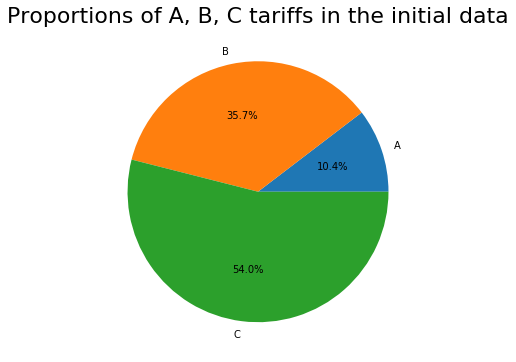

In [18]:
#checking proportions of different plans in the initial data.
plan = clients.groupby('tariff_plan').size()

# drawing plot
plan.plot(kind='pie', subplots=True, figsize=(6, 6),autopct='%1.1f%%')

# decoration
plt.title("Proportions of A, B, C tariffs in the initial data",fontsize=22)

plt.ylabel("")
plt.show()

More than half of the customers(54%) prefer the cheapest tariff.

36% prefer tariff B.

and only 10% prefer tarriiff A.

<a id='inactive'></a>


**looking for not active clients**

In [19]:
#checking for last activity day for each user:
last_activity = data.groupby("user_id")["date"].max().reset_index()

# converting data to the same time zone.
for col in data.select_dtypes(['datetimetz']).columns:
    data[col] = data[col].dt.tz_convert(None)
    
for col in last_activity.select_dtypes(['datetimetz']).columns:
    last_activity[col] = last_activity[col].dt.tz_convert(None)
    
#calculating the amount of not active days for each user    
last_activity['not_active_days'] = (data.date.max() - last_activity['date']).dt.days
last_activity

,user_id,date,not_active_days
0,166377,2019-11-27 21:00:00,0
1,166391,2019-11-21 21:00:00,6
2,166392,2019-11-27 21:00:00,0
3,166399,2019-10-22 21:00:00,36
4,166405,2019-11-27 21:00:00,0
...,...,...,...
302,168583,2019-11-27 21:00:00,0
303,168598,2019-11-27 21:00:00,0
304,168601,2019-11-27 21:00:00,0
305,168603,2019-11-27 21:00:00,0


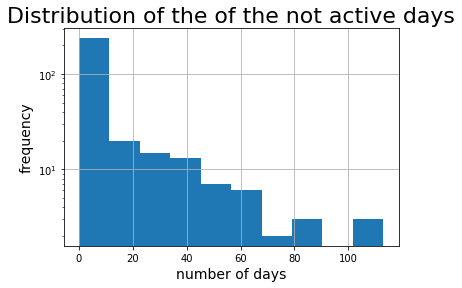

In [20]:
#ploting histogram to check the distribution of the not active days.

last_activity.hist('not_active_days',log=True)
#decorating and adding median value:
plt.rcParams["figure.figsize"] = [15,5]
plt.title('Distribution of the of the not active days', fontsize=22)
plt.xlabel('number of days', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.show()



I can see that most of the clients have 10 days of inactivity. But this period of days may be associated with a trip abroad or for another reason.I will consider as an inactive client those who have inactive days for more than 30 days.



In [21]:
#merging tables:
data = pd.merge(left=data,right=clients, how='inner',on=['user_id'])

In [22]:
#making slice of data for inactive clients with period more than 30:
churn_users = last_activity.query('not_active_days> 30')

#Selecting inactive clients
users_churn =  churn_users['user_id']
churn_data = data.query('user_id in @users_churn')

def unique_counts(churn_data):
   for i in churn_data.columns:
       count = churn_data[i].nunique()
       print(i, ": ", count)
unique_counts(churn_data)




user_id :  37
date :  77
direction :  2
internal :  2
operator_id :  108
is_missed_call :  2
calls_count :  210
call_duration :  990
total_call_duration :  1594
month :  3
tariff_plan :  3
date_start :  25


We have 37 inactive customers with 3 different tariffs.



<a id='correction'></a>


In [23]:
number_of_users_by_plans = data.groupby('tariff_plan', as_index=False).agg({'user_id' : 'nunique'})
number_of_users_by_plans.columns = ['plan','total_users']
number_of_users_by_plans

,plan,total_users
0,A,34
1,B,112
2,C,161


In [24]:
number_of_not_active_users_by_plans = churn_data.groupby('tariff_plan', as_index=False).agg({'user_id' : 'nunique'})
number_of_not_active_users_by_plans.columns = ['plan','not_active_users']
number_of_not_active_users_by_plans 

,plan,not_active_users
0,A,4
1,B,14
2,C,19


<a id='plans_inactive'></a>


In [25]:
churn_rate_data = pd.merge(left=number_of_users_by_plans,right=number_of_not_active_users_by_plans, how='inner',on=['plan'])
churn_rate_data

,plan,total_users,not_active_users
0,A,34,4
1,B,112,14
2,C,161,19


In [26]:
churn_rate_data['churn_rate'] = ((churn_rate_data['not_active_users']/churn_rate_data['total_users'])*100).round()
churn_rate_data

,plan,total_users,not_active_users,churn_rate
0,A,34,4,12.0
1,B,112,14,12.0
2,C,161,19,12.0


**The percentage of user churn in different plans is the same.**

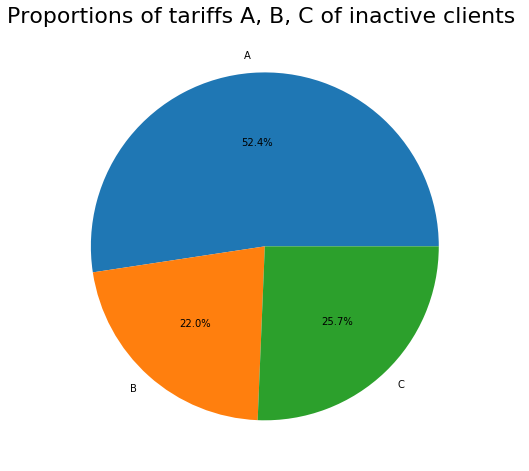

In [27]:
#looking proporsion of plans of inactive clients

# preparing data
plan_churn = churn_data.groupby('tariff_plan').size()

# drawing plot
plan_churn.plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')

# decoration
plt.title("Proportions of tariffs A, B, C of inactive clients ",fontsize=22)

plt.ylabel("")
plt.show()

Almost half of the users who left the company were at the most expensive tarrif - A.

26% - of the users who left the company were at plan C.

and 21% of  the users who left the company were at plan B.



**filtering and preparing data for profit calculation**

In [28]:
#making slice of data for active clients only
active_clients = data.query('user_id not in @users_churn')

#selecting only outgoing direction, since incoming calls for all plans are free 
active_clients = active_clients.query('direction in "out"')


### Step 4. Analyze the data

<a id='internal'></a>


**internal_calls**

In [29]:
#calculating monthly internal call duration in order to check if there are clients who exceed the monthly plan limit of 2000 minutes(120,000 sec) 
 
#making slice of internal calls in our data    
internal_calls = active_clients.loc[active_clients['internal'] ==True ]

#grouping by months and call duration for each user
internal_calls  = pd.pivot_table(internal_calls, index=['user_id','tariff_plan','month'], aggfunc= {'call_duration':'sum', 'date_start':'min'}).reset_index()
internal_calls

,user_id,tariff_plan,month,call_duration,date_start
0,166377,B,8,10,2019-08-01
1,166377,B,9,0,2019-08-01
2,166377,B,10,2,2019-08-01
3,166377,B,11,120,2019-08-01
4,166391,C,8,0,2019-08-01
...,...,...,...,...,...
246,168416,C,10,0,2019-10-24
247,168416,C,11,0,2019-10-24
248,168500,B,11,6,2019-10-28
249,168601,C,11,0,2019-10-31


<a id='calls'></a>


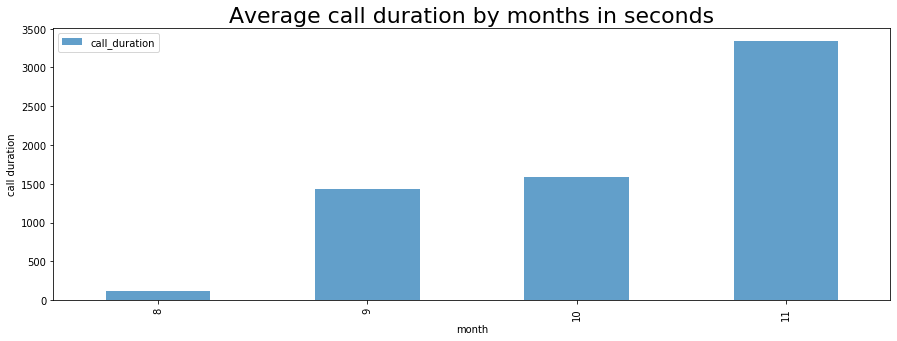

In [30]:
#visualization of our data of the duration of calls by months

plot_internal = internal_calls.groupby('month').call_duration.mean().reset_index()
plot_internal = plot_internal.sort_values(by ='call_duration')
plot_internal.plot(kind='bar',x='month',y='call_duration', alpha=0.7 , legend=True,figsize=(15,5))
plt.title("Average call duration by months in seconds",fontsize=22)

plt.ylabel("call duration")
plt.show()


In [31]:
#checking if there are clients who exceed the monthly plan limit of 2000 minutes(120,000 sec) 
internal_calls.query('call_duration  > 120000')

,user_id,tariff_plan,month,call_duration,date_start


As we can see, we do not have clients making internal calls for more than 12000 seconds per month.

<a id='not_internal'></a>


**Not internal calls**

In [32]:
#selecting only not internal calls
not_internal_calls = active_clients.loc[active_clients['internal'] == False ]

#calculating period of activity of each client    
not_internal_calls['active_months'] = (active_clients['date'].max() - not_internal_calls['date_start'])/np.timedelta64(1, 'M')

#grouping relavant data for profit calculations.
not_internal_calls = pd.pivot_table(not_internal_calls, index=['user_id'], aggfunc= {'call_duration':'sum', 'active_months':'max' , 'tariff_plan':'max'}).reset_index()
not_internal_calls



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,active_months,call_duration,tariff_plan
0,166377,3.905624,310419,B
1,166405,3.872769,770393,B
2,166406,3.872769,311820,B
3,166407,3.872769,19058,A
4,166485,3.741350,346789,B
...,...,...,...,...
192,168481,1.014395,280,B
193,168500,1.014395,0,B
194,168601,0.915830,24264,C
195,168603,0.915830,905,B


<a id='profit_not_internal'></a>


In [33]:
#calculation of profit by "not_internal_calls" for each client

def month_profit(row):
    
    call_duration = row['call_duration']
    plan = row['tariff_plan']
    calls_profit = 0
    
    if plan == 'A':
        calls_profit = math.ceil(call_duration/60*0.4)
                           
        return calls_profit 
    
    if plan =='B':
        calls_profit = math.ceil(call_duration/60*0.5)
    
        
        return calls_profit 
    
    if plan =='C':
        calls_profit = math.ceil(call_duration/60*0.7) 
            
        return calls_profit 
       
       
                    
not_internal_calls['profit_internal_calls'] = not_internal_calls.apply(month_profit, axis=1) 
not_internal_calls

,user_id,active_months,call_duration,tariff_plan,profit_internal_calls
0,166377,3.905624,310419,B,2587
1,166405,3.872769,770393,B,6420
2,166406,3.872769,311820,B,2599
3,166407,3.872769,19058,A,128
4,166485,3.741350,346789,B,2890
...,...,...,...,...,...
192,168481,1.014395,280,B,3
193,168500,1.014395,0,B,0
194,168601,0.915830,24264,C,284
195,168603,0.915830,905,B,8


<a id='tariff_profit'></a>


In [34]:
#calculation of tariff profit for each client.
def taarif_price(row):
    
    plan = row['tariff_plan']
    period = row['active_months']
    monthly_charge_A = 5000
    monthly_charge_B = 2000
    monthly_charge_C = 1000
    taarif_price= 0
    
    if plan == 'A':
        taarif_price =  math.ceil(monthly_charge_A*period)
                           
        return taarif_price 
    
    if plan =='B':
        taarif_price =  math.ceil(monthly_charge_B*period)
    
        
        return taarif_price 
    
    if plan =='C':
        taarif_price =  math.ceil(monthly_charge_C*period)
            
        return taarif_price 
       
       
                    
not_internal_calls['profit_basic_price'] = not_internal_calls.apply(taarif_price, axis=1) 
not_internal_calls

,user_id,active_months,call_duration,tariff_plan,profit_internal_calls,profit_basic_price
0,166377,3.905624,310419,B,2587,7812
1,166405,3.872769,770393,B,6420,7746
2,166406,3.872769,311820,B,2599,7746
3,166407,3.872769,19058,A,128,19364
4,166485,3.741350,346789,B,2890,7483
...,...,...,...,...,...,...
192,168481,1.014395,280,B,3,2029
193,168500,1.014395,0,B,0,2029
194,168601,0.915830,24264,C,284,916
195,168603,0.915830,905,B,8,1832


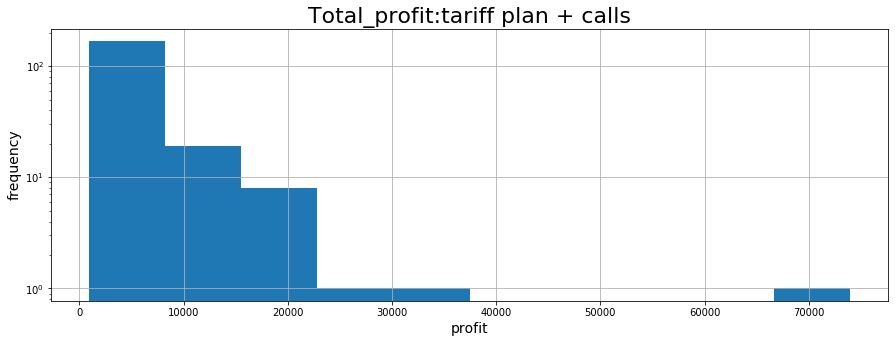

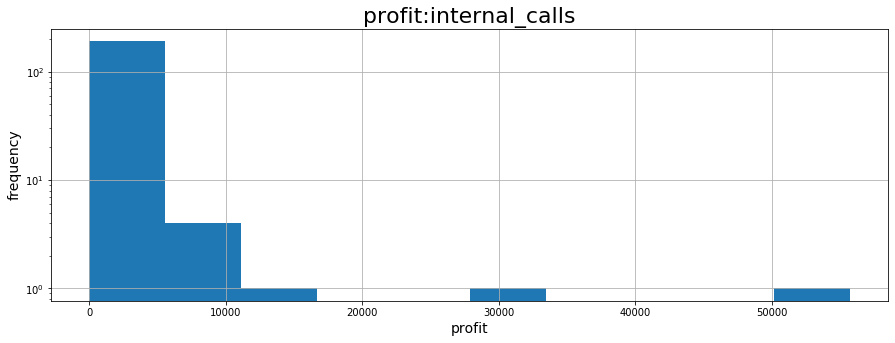

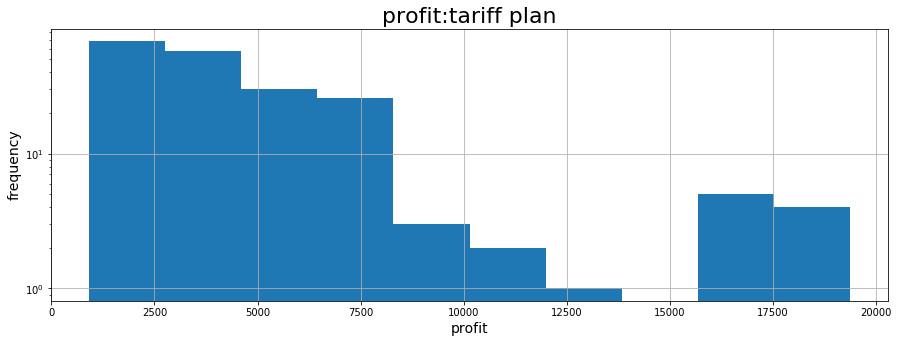

In [35]:
#calclulatting total profit for each client
not_internal_calls['total_profit'] = not_internal_calls['profit_internal_calls'] + not_internal_calls['profit_basic_price'] 

#visualization of your profit calculations
not_internal_calls.hist('total_profit', log= True)
plt.title('Total_profit:tariff plan + calls', fontsize=22)
plt.xlabel('profit', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.show()

not_internal_calls.hist('profit_internal_calls', log= True)
plt.title('profit:internal_calls', fontsize=22)
plt.xlabel('profit', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.show()

not_internal_calls.hist('profit_basic_price', log= True)
plt.title('profit:tariff plan', fontsize=22)
plt.xlabel('profit', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.show()



<a id='outliers'></a>


**checking for outliers in our data**

In [36]:
#Examinating for outliers in total_profit
not_internal_calls.query('total_profit > 70000')
not_internal_calls.drop(not_internal_calls[not_internal_calls['total_profit'] == 78667].index,axis=0,inplace=True) 
not_internal_calls.drop(not_internal_calls[not_internal_calls['total_profit']>70000].index,axis=0,inplace=True)

I see that there is only one client with a huge profit.I will drop him , since it does not characterize the other data we have.

In [37]:
#Examinating for outliers in internal calls profit
not_internal_calls.query('profit_internal_calls > 12000')

,user_id,active_months,call_duration,tariff_plan,profit_internal_calls,profit_basic_price,total_profit
18,166658,3.511366,1969517,B,16413,7023,23436
187,168361,1.178669,4240557,A,28271,5894,34165


We have two users with a very large profit in "internal_calls". One of them was active only for 1.17 month and it seems illogical hat he used the service of "internal_calls" so much. I will drop this client.

In [38]:
#dropping user with huge profit in internal call and small activity period
not_internal_calls.drop(not_internal_calls[not_internal_calls['profit_internal_calls'] == 31553].index,axis=0,inplace=True) 


In [39]:
#examinating for outliers in tariif plans profit
not_internal_calls.query('profit_basic_price > 15000')

,user_id,active_months,call_duration,tariff_plan,profit_internal_calls,profit_basic_price,total_profit
3,166407,3.872769,19058,A,128,19364,19492
12,166541,3.708495,12638,A,85,18543,18628
15,166609,3.544221,6774,A,46,17722,17768
29,166713,3.445656,222,A,2,17229,17231
31,166725,3.412801,57942,A,387,17065,17452
41,166843,3.248527,20041,A,134,16243,16377
45,166901,3.182817,10763,A,72,15915,15987
46,166916,3.182817,159617,A,1065,15915,16980


All clients with a large profit in the basic tariff, have the most expensive plan and have been in the system for a long time, so it is logical that they spent more than other customers for tariff fees.

In [40]:
#renaming our data
data_new=not_internal_calls.copy()


<a id='simulations'></a>


In [41]:
data_new['simulation_A'] = data_new['active_months']*5000 + (data_new['call_duration'])/60*0.4
data_new['simulation_B'] = data_new['active_months']*2000 + (data_new['call_duration'])/60*0.5
data_new['simulation_C'] = data_new['active_months']*1000 + (data_new['call_duration'])/60*0.7

data_new

,user_id,active_months,call_duration,tariff_plan,profit_internal_calls,profit_basic_price,total_profit,simulation_A,simulation_B,simulation_C
0,166377,3.905624,310419,B,2587,7812,10399,21597.581727,10398.073691,7527.179345
1,166405,3.872769,770393,B,6420,7746,14166,24499.800640,14165.480589,12860.687795
2,166406,3.872769,311820,B,2599,7746,10345,21442.647307,10344.038923,7510.669461
3,166407,3.872769,19058,A,128,19364,19492,19490.900640,7904.355589,4095.112795
4,166485,3.741350,346789,B,2890,7483,10373,21018.676292,10372.608183,7787.221592
...,...,...,...,...,...,...,...,...,...,...
192,168481,1.014395,280,B,3,2029,2032,5073.839397,2031.122426,1017.661213
193,168500,1.014395,0,B,0,2029,2029,5071.972730,2028.789092,1014.394546
194,168601,0.915830,24264,C,284,916,1200,4740.909469,2033.859788,1198.909894
195,168603,0.915830,905,B,8,1832,1840,4585.182803,1839.201454,926.388227


In [42]:
data_new['min_profit'] = pd.DataFrame([data_new['simulation_A'], 
                                       data_new['simulation_B'],
                                       data_new['simulation_C']]).min()
data_new

,user_id,active_months,call_duration,tariff_plan,profit_internal_calls,profit_basic_price,total_profit,simulation_A,simulation_B,simulation_C,min_profit
0,166377,3.905624,310419,B,2587,7812,10399,21597.581727,10398.073691,7527.179345,7527.179345
1,166405,3.872769,770393,B,6420,7746,14166,24499.800640,14165.480589,12860.687795,12860.687795
2,166406,3.872769,311820,B,2599,7746,10345,21442.647307,10344.038923,7510.669461,7510.669461
3,166407,3.872769,19058,A,128,19364,19492,19490.900640,7904.355589,4095.112795,4095.112795
4,166485,3.741350,346789,B,2890,7483,10373,21018.676292,10372.608183,7787.221592,7787.221592
...,...,...,...,...,...,...,...,...,...,...,...
192,168481,1.014395,280,B,3,2029,2032,5073.839397,2031.122426,1017.661213,1017.661213
193,168500,1.014395,0,B,0,2029,2029,5071.972730,2028.789092,1014.394546,1014.394546
194,168601,0.915830,24264,C,284,916,1200,4740.909469,2033.859788,1198.909894,1198.909894
195,168603,0.915830,905,B,8,1832,1840,4585.182803,1839.201454,926.388227,926.388227


In [43]:
def new_plan(row):
    
    profit = row['min_profit']
    A = row['simulation_A']
    B = row['simulation_B']
    C = row['simulation_C']
    
    
    if profit == A:
        return 'A'
            
    if profit == B:
        return 'B'
    
    if profit == C:
        return 'C'
       
                    
data_new['new_plan'] = data_new.apply(new_plan, axis=1) 


#checking new plans distribution
data_new['new_plan'].value_counts()


C    190
B      5
A      1
Name: new_plan, dtype: int64

In [44]:
#let's check how much it will cost to switch users from plan A to plan B
def taarif_priceAB(row):
        
    plan = row['tariff_plan']
    period = row['active_months']
    calls = row['call_duration']
    monthly_charge_A = 5000
    monthly_charge_B = 2000
    monthly_charge_C = 1000
    taarif_price= 0
    
    if plan == 'A':
        taarif_price =  math.ceil(monthly_charge_B*period+calls/60*0.4)
                           
        return taarif_price 
    
    if plan =='B':
        taarif_price =  math.ceil(monthly_charge_B*period+calls/60*0.5)
    
        
        return taarif_price 
    
    if plan =='C':
        taarif_price =  math.ceil(monthly_charge_C*period+calls/60*0.7)
            
        return taarif_price 
       
     
                    
data_new['plan_change_from_AtoB'] = data_new.apply(taarif_priceAB, axis=1) 


cost_from_A_to_B = data_new['total_profit'].sum()-data_new['plan_change_from_AtoB'].sum()
print(cost_from_A_to_B)
rate_cost_from_A_to_B = (((data_new['total_profit'].sum()-data_new['plan_change_from_AtoB'].sum())/data_new['total_profit'].sum())*100).round()
rate_cost_from_A_to_B




163113


15.0

If a company transfers customers from tariff A to tariff B, it will cost 163113 and the company will lose 15% of its profits.

In [45]:
#let's check how much it will cost to switch users from plan A to plan C
def taarif_priceAC(row):
        
    plan = row['tariff_plan']
    period = row['active_months']
    calls = row['call_duration']
    monthly_charge_A = 5000
    monthly_charge_B = 2000
    monthly_charge_C = 1000
    taarif_price= 0
    
    if plan == 'A':
        taarif_price =  math.ceil(monthly_charge_C*period+calls/60*0.4)
                           
        return taarif_price 
    
    if plan =='B':
        taarif_price =  math.ceil(monthly_charge_B*period+calls/60*0.5)
    
        
        return taarif_price 
    
    if plan =='C':
        taarif_price =  math.ceil(monthly_charge_C*period+calls/60*0.7)
            
        return taarif_price 
       
     
                    
data_new['plan_change_from_AtoC'] = data_new.apply(taarif_priceAC, axis=1) 

cost_from_A_to_C = data_new['total_profit'].sum()-data_new['plan_change_from_AtoC'].sum()
print(cost_from_A_to_C )
cost_from_A_to_C = ((cost_from_A_to_C/data_new['total_profit'].sum())*100).round()

cost_from_A_to_C



217452


21.0

If a company transfers customers from tariff A to tariff C, it will cost 217452 and thecompany will lose 21% of its profits.

In [46]:
#let's check how much it will cost to switch users from plan B to plan C
def taarif_priceBC(row):
        
    plan = row['tariff_plan']
    period = row['active_months']
    calls = row['call_duration']
    monthly_charge_A = 5000
    monthly_charge_B = 2000
    monthly_charge_C = 1000
    taarif_price= 0
    
    if plan == 'A':
        taarif_price =  math.ceil(monthly_charge_A*period+calls/60*0.4)
                           
        return taarif_price 
    
    if plan =='B':
        taarif_price =  math.ceil(monthly_charge_C*period+calls/60*0.5)
    
        
        return taarif_price 
    
    if plan =='C':
        taarif_price =  math.ceil(monthly_charge_C*period+calls/60*0.7)
            
        return taarif_price 
       
     
                    
data_new['plan_change_from_BtoC'] = data_new.apply(taarif_priceBC, axis=1) 

cost_from_B_to_C = data_new['total_profit'].sum()-data_new['plan_change_from_BtoC'].sum()
rate_cost_from_B_to_C = ((cost_from_B_to_C/data_new['total_profit'].sum())*100).round()
print(cost_from_B_to_C)
rate_cost_from_B_to_C

190199


18.0

**Here what we have:**
- 1- If a company transfers customers from tariff A to tariff B, it will cost 163113 and the company will lose 15% of its profits.
- 2- If a company transfers customers from tariff A to tariff C, it will cost 217452 and thecompany will lose 21% of its profits.
- 3- If a company transfers customers from tariff B to tariff C, it will cost 190199 and thecompany will lose 18% of its profits.


<a id='new_plans'></a>


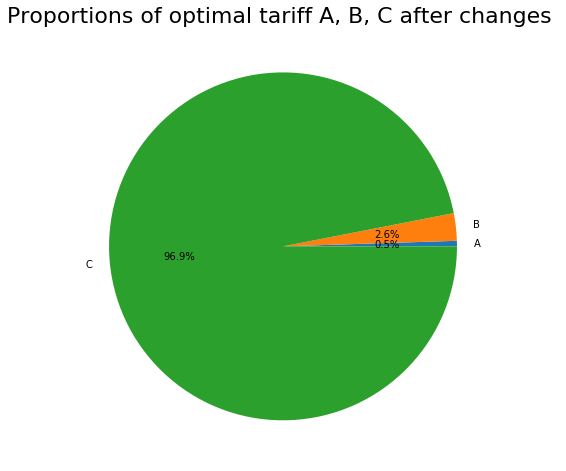

In [47]:
#visualizing new plans distribution
#preparing data
plan_new = data_new.groupby('new_plan').size()

# drawing plot
plan_new.plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')

# decoration
plt.title("Proportions of optimal tariff A, B, C after changes ",fontsize=22)

plt.ylabel("")
plt.show()

It looks like most customers are overpaying and it would be more profitable for them to be at the cheapest tariff!

The optimal plan for 97% of users is the cheapest plan, and it is C.None of our users benefits from being on the expensive A.

In [48]:
#calculating the profit difference after plans changing
delta_profit = data_new['total_profit'].sum()  - data_new['min_profit'].sum() 

print(delta_profit)
 
((delta_profit/data_new['total_profit'].sum())*100).round()



373468.6837148607


35.0

Calculating the profit difference after plans changing: it will cost 373468 and the company will lose 35% of its profits.

<a id='test'></a>


### Step 5. Test the hypotheses

#formulation of hypotheses for the Shapiro - Wilk test

H0: The distribution seems to be normal.
    
H1: The distribution is not normal.

In [49]:
import random
#Normality Tests. The Shapiro–Wilk Test

from scipy import stats as st

#creating samles

profit_before_list = data_new['total_profit'].tolist()
profit_before = random.sample(profit_before_list, k=100)

results =  st.shapiro(profit_before)
p_value = results[1]
alpha = 0.05

print('p-value: ', p_value)

if (p_value < alpha):
    print("Null hypothesis rejected: the distribution is not normal")
else:
    print("Failed to reject the null hypothesis: the distribution seems to be normal") 

p-value:  1.1608575906096874e-10
Null hypothesis rejected: the distribution is not normal


The data is not normally distributed.

#formulation of hypotheses for the mannwhitneyu

H0: The difference between the groups before changes and after chnages is NOT statistically significant.
    
H1: The difference between the groups before changes and after chnages is statistically significant.

In [50]:
#I check if there is a significant static difference between the groups before and after the changes.
import random

profit_before_list = data_new['total_profit'].tolist()
profit_after_list = data_new['min_profit'].tolist()
#creating samles


profit_before = random.sample(profit_before_list, k=100)
profit_after  = random.sample(profit_after_list, k=100)

alpha = 0.05

results =st.mannwhitneyu(profit_after, profit_before, True, 'less') 

print('p-value: ',  results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: The difference between the groups before changes and after chnages is statistically significant.")
else:
    print("Failed to reject the null hypothesis: The difference between the groups before changes and after chnages is NOT statistically significant") 

p-value:  1.995041513396678e-06
Null hypothesis rejected: The difference between the groups before changes and after chnages is statistically significant.


It seems that we can't make conclusions about the difference in before and after chnages.

I use mannwhitneyu() method because our data is not normally distributed.

The fourth parameter is written as a string: 'less', 'two-sided', or 'greater'. That's how we compare the first dataset passed to the method with the second one. In this particular task we need to check whether the second dataset is greater and the first one smaller, so we'll set the parameter as 'less'.

### Summary and suggestions:

**What we have:**


- On our initial data: More than half of the users (54%) prefer the cheapest tariff.  36% prefer the tariff B and only 10% prefer tariff A.


- The churn rate for the period we have is around 7%.


- The percentage of user churn in different plans is almost the same.


- Clients dont make internal calls for more than 2000 minutes per month.This means that none of the customers take full advantage of the package.


- The optimal plan for 97% of users is the cheapest plan, and it is C.None of our users benefits from being on the expensive A.


- 1- If the If a company transfers customers from tariff A to tariff B, it will cost 163113 and the company will lose 15% of its profits.
- 2- If a company transfers customers from tariff A to tariff C, it will cost 217452 and thecompany will lose 21% of its profits.
- 3- If a company transfers customers from tariff B to tariff C, it will cost 190199 and thecompany will lose 18% of its profits.
- 4 -Calculating the profit difference after plans changing: it will cost 373468 and the company will lose 35% of its profits.
- The statistical test shows that the difference between the two groups (before and after) is significant.


**Suggestions**

1. If the company's task is to earn as much money as possible, at any cost, then I recommend not changing anything. 


2. If the company plans to work on the market for a long years. I recommend discussing with the product manager and finance department how much the company is willing to spend for the process of transferring customers to a cheaper plan.I recommend at least transferring group A to plan B, because they overpay everyone more than other groups.This action will cost the company less than transferring other groups.

By this action:

- the company will not lose a lot of money, since there are only 10% of customers on tariff A.


- the company will not lose this client. And in the long term, this action will pay off.


- the company will build a trusting relationship with its customers.


- the company will build a name for itself in the market as a company that takes care of its customers.

The link for presentation: https://drive.google.com/file/d/1S8FJgwoxogIAvZU2VIhvwrgX8KB6JotR/view?usp=sharing